# **Sentence Embedding Experiments**

---



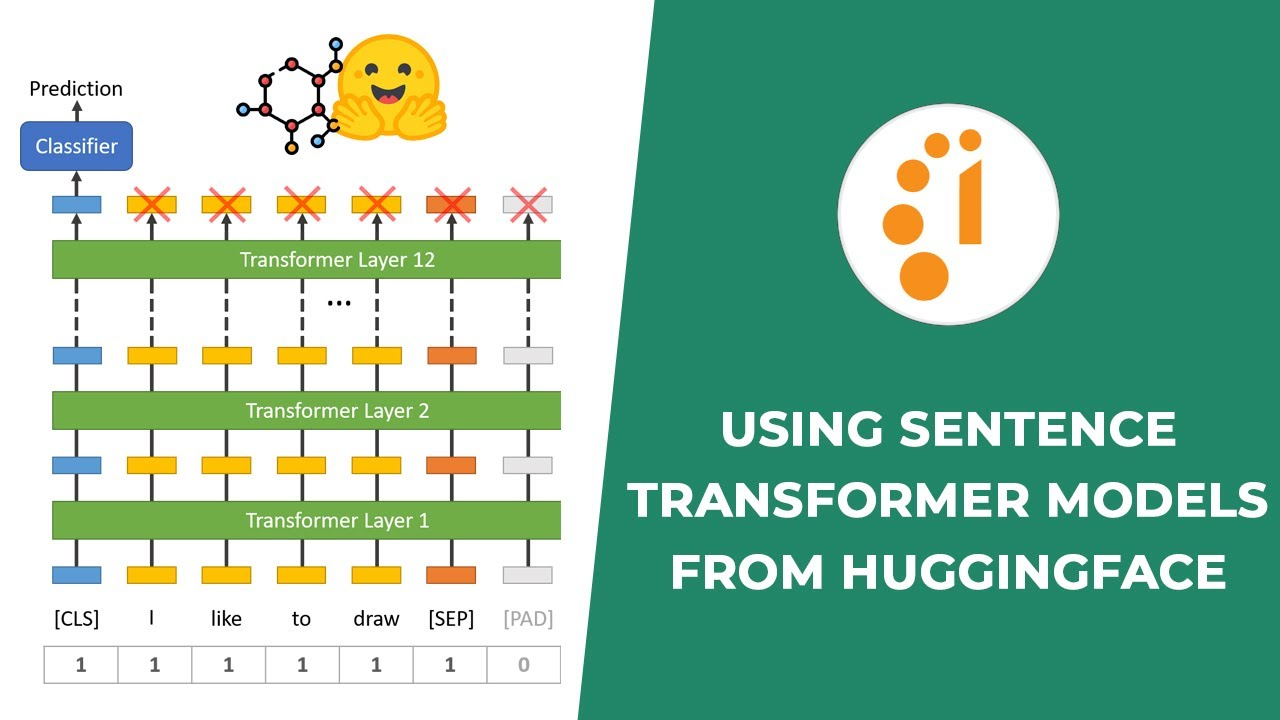

In [ ]:
!pip install sentence_transformers

In [25]:
import pandas as pd
from pathlib import Path
from sentence_transformers import SentenceTransformer
pd.set_option('display.max_colwidth', None)
dataset = pd.read_csv("/content/drive/MyDrive/Papermate/PaperMate/data/filtered_data.csv")
dataset.head()

,titles,abstracts,terms,urls,ids
0,DAE-Former: Dual Attention-guided Efficient Transformer for Medical Image Segmentation,"Transformers have recently gained attention in the computer vision domain due\nto their ability to model long-range dependencies. However, the self-attention\nmechanism, which is the core part of the Transformer model, usually suffers\nfrom quadratic computational complexity with respect to the number of tokens.\nMany architectures attempt to reduce model complexity by limiting the\nself-attention mechanism to local regions or by redesigning the tokenization\nprocess. In this paper, we propose DAE-Former, a novel method that seeks to\nprovide an alternative perspective by efficiently designing the self-attention\nmechanism. More specifically, we reformulate the self-attention mechanism to\ncapture both spatial and channel relations across the whole feature dimension\nwhile staying computationally efficient. Furthermore, we redesign the skip\nconnection path by including the cross-attention module to ensure the feature\nreusability and enhance the localization power. Our method outperforms\nstate-of-the-art methods on multi-organ cardiac and skin lesion segmentation\ndatasets without requiring pre-training weights. The code is publicly available\nat https://github.com/mindflow-institue/DAEFormer.",['cs.CV'],http://arxiv.org/abs/2212.13504v3,2212.13504v3
1,Multi-modal Learning with Missing Modality via Shared-Specific Feature Modelling,"The missing modality issue is critical but non-trivial to be solved by\nmulti-modal models. Current methods aiming to handle the missing modality\nproblem in multi-modal tasks, either deal with missing modalities only during\nevaluation or train separate models to handle specific missing modality\nsettings. In addition, these models are designed for specific tasks, so for\nexample, classification models are not easily adapted to segmentation tasks and\nvice versa. In this paper, we propose the Shared-Specific Feature Modelling\n(ShaSpec) method that is considerably simpler and more effective than competing\napproaches that address the issues above. ShaSpec is designed to take advantage\nof all available input modalities during training and evaluation by learning\nshared and specific features to better represent the input data. This is\nachieved from a strategy that relies on auxiliary tasks based on distribution\nalignment and domain classification, in addition to a residual feature fusion\nprocedure. Also, the design simplicity of ShaSpec enables its easy adaptation\nto multiple tasks, such as classification and segmentation. Experiments are\nconducted on both medical image segmentation and computer vision\nclassification, with results indicating that ShaSpec outperforms competing\nmethods by a large margin. For instance, on BraTS2018, ShaSpec improves the\nSOTA by more than 3% for enhancing tumour, 5% for tumour core and 3% for whole\ntumour.",['cs.CV'],http://arxiv.org/abs/2307.14126v1,2307.14126v1
2,Unite-Divide-Unite: Joint Boosting Trunk and Structure for High-accuracy Dichotomous Image Segmentation,"High-accuracy Dichotomous Image Segmentation (DIS) aims to pinpoint\ncategory-agnostic foreground objects from natural scenes. The main challenge\nfor DIS involves identifying the highly accurate dominant area while rendering\ndetailed object structure. However, directly using a general encoder-decoder\narchitecture may result in an oversupply of high-level features and neglect the\nshallow spatial information necessary for partitioning meticulous structures.\nTo fill this gap, we introduce a novel Unite-Divide-Unite Network (UDUN} that\nrestructures and bipartitely arranges complementary features to simultaneously\nboost the effectiveness of trunk and structure identification. The proposed\nUDUN proceeds from several strengths. First, a dual-size input feeds into the\nshared backbone to produce more holistic and detailed features while keeping\nthe model lightweight. Secon

# **Model 1 - "all-MiniLM-L6-v2"**

---

The all-MiniLM-L6-v2 model is a sentence-transformers model that maps sentences and paragraphs to a `384-dimensional dense vector space`. It can be used for tasks like clustering or semantic search, where you want to find similar or relevant texts based on a query or a reference text.

The model is based on the MiniLM architecture, which is a smaller and faster version of BERT. The model has only `6 transformer layers`, compared to 12 in BERT-base, but still achieves competitive results on various natural language understanding tasks. The model is also trained on a large amount of data, more than 1 billion sentence pairs from various sources and domains, to make it a general-purpose model that can handle diverse inputs.

---

## Here are some reasons why I have chosen this model for my project:

- `It is very fast`: it can encode up to 14,200 sentences per second on GPU and 750 on CPU, which is 5 times faster than the all-mpnet-base-v2 model, which has the best quality among the all-* models.


- `It has good quality`: it achieves an average performance of 58.80 on 14 sentence embedding datasets and 49.54 on 6 semantic search datasets, which is comparable or better than other models with similar size or speed.

- `It is easy to use`: you can use the model with the sentence-transformers library, which provides a simple and convenient way to encode sentences and perform semantic search. You can also use the model with the HuggingFace transformers library, which gives you more flexibility and control over the model.

- `Lower Memory Requirements:` Given its smaller size, MiniLM requires less memory for training and inference. This could be a crucial factor if you're working with limited hardware resources.

---
## Model Architecture


- The model is based on the MiniLM architecture, which is a smaller and faster version of BERT. The model has only 6 transformer layers, compared to 12 in BERT-base, but still achieves competitive results on various natural language understanding tasks. The model uses a self-attention mechanism to encode the input tokens into contextualized embeddings, and then applies a mean pooling operation to obtain the sentence embedding.
-
The model is also trained on a large amount of data, more than 1 billion sentence pairs from various sources and domains, to make it a general-purpose model that can handle diverse inputs. The training data includes natural language inference, paraphrasing, semantic textual similarity, question answering, information retrieval, and more. The model is fine-tuned with a contrastive loss function that encourages the embeddings of similar sentences to be close and dissimilar sentences to be far in the vector space.
---
**Note** : *A mean pooling operation is a way of finding the average of a group of numbers. For example, if you have four numbers: 2, 4, 6, and 8, the average of these numbers is 5.*

*The all-MiniLM-L6-v2 model uses a mean pooling operation to make a sentence into a vector. A vector is a list of numbers that shows the meaning of something. Each word or part of a word in the sentence has its own vector. The mean pooling operation finds the average of all these vectors, and makes a new vector that shows the meaning of the whole sentence. This vector can be used for finding similar or related sentences*

```
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)

```



In [3]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Our feature we like to encode
sentences = dataset['titles']

# Features are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [4]:
# Print the embeddings
c = 0
for sentence, embedding in zip(sentences, embeddings):

    print("Sentence:", sentence)
    print("Embedding dimension:", len(embedding))
    print("Title length:", len(sentence))
    print("")

    if c >=5:
        break
    c +=1

Sentence: DAE-Former: Dual Attention-guided Efficient Transformer for Medical Image Segmentation
Embedding dimension: 384
Title length: 86

Sentence: Multi-modal Learning with Missing Modality via Shared-Specific Feature Modelling
Embedding dimension: 384
Title length: 80

Sentence: Unite-Divide-Unite: Joint Boosting Trunk and Structure for High-accuracy Dichotomous Image Segmentation
Embedding dimension: 384
Title length: 103

Sentence: MDViT: Multi-domain Vision Transformer for Small Medical Image Segmentation Datasets
Embedding dimension: 384
Title length: 84

Sentence: Learning Transferable Object-Centric Diffeomorphic Transformations for Data Augmentation in Medical Image Segmentation
Embedding dimension: 384
Title length: 118

Sentence: Image Segmentation Keras : Implementation of Segnet, FCN, UNet, PSPNet and other models in Keras
Embedding dimension: 384
Title length: 96



## Testing the embedding model¶

In [7]:
paper_you_like = input("Enter your topic of interest here 👇 \n")
paper_you_like

Enter your topic of interest here 👇 
I need the paper for segmenting the medical image 


'I need the paper for segmenting the medical image '

In [8]:
from sentence_transformers import util
cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like))
cosine_scores

tensor([[0.3508],
        [0.0241],
        [0.3215],
        ...,
        [0.1378],
        [0.0132],
        [0.0599]])

In [9]:
import torch
top_similar_papers = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
top_similar_papers

torch.return_types.topk(
values=tensor([[0.5788],
        [0.5760],
        [0.5746],
        [0.5725],
        [0.5690]]),
indices=tensor([[  848],
        [ 1140],
        [  824],
        [16175],
        [ 2144]]))

In [10]:
for i in top_similar_papers.indices:
#     print(i)
    print(sentences[i.item()])

Towards Robust General Medical Image Segmentation
Elastic Boundary Projection for 3D Medical Image Segmentation
Medical image segmentation with imperfect 3D bounding boxes
Is attention all you need in medical image analysis? A review
Medical Image Segmentation and Localization using Deformable Templates


# **Model 2 - "jinaai/jina-embedding-t-en-v1"**
---
The jinaai/jina-embedding-t-en-v1 model is based on the TinyBERT architecture, which is also a smaller and faster version of BERT. The model has only 4 transformer layers, compared to 12 in BERT-base, but still achieves good results on various natural language understanding tasks. The model uses a self-attention mechanism to encode the input tokens into contextualized embeddings, and then applies a mean pooling operation to obtain the sentence embedding. The model is trained on a large amount of data, more than 380 million pairs of sentences, which include both query-document pairs. These pairs were obtained from various domains and were carefully selected through a thorough cleaning process.

---

## Model Performance
- The all-MiniLM-L6-v2 model has several advantages over the jinaai/jina-embedding-t-en-v1 model:

1. It is faster: it can encode up to 14,200 sentences per second on GPU and 750 on CPU, which is much faster than the jinaai/jina-embedding-t-en-v1 model, which can encode up to 1730 sentences per second on CPU.

2. It has better quality: it achieves an average performance of 58.80 on 14 sentence embedding datasets and 49.54 on 6 semantic search datasets, which is comparable or better than the jinaai/jina-embedding-t-en-v1 model, which achieves an average performance of 57.64 on 14 sentence embedding datasets and 48.32 on 6 semantic search datasets.
3. It has larger output dimensionality: it maps sentences and paragraphs to a 384-dimensional dense vector space, compared to 312-dimensional for the jinaai/jina-embedding-t-en-v1 model.

- The jinaai/jina-embedding-t-en-v1 model has some advantages over the all-MiniLM-L6-v2 model:

1. It is smaller: it has only 14 million parameters, compared to 80 million for the all-MiniLM-L6-v2 model.
2. It is more suitable for edge devices: it offers lightning-fast inference on CPUs, making it perfectly suitable for devices where computational resources are limited.

---



In [11]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim

sentences = dataset['titles']

model = SentenceTransformer('jinaai/jina-embedding-t-en-v1')
embeddings = model.encode(sentences)
print(cos_sim(embeddings[0], embeddings[1]))


tensor([[0.0999]])


In [12]:
from sentence_transformers import util
import torch


paper_you_like2 = input("Enter your topic of interest here 👇 \n")
print(50*'*')


cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))
print(50*'*')


top_similar_papers2 = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
print(50*'*')

for i in top_similar_papers2.indices:
#     print(i)
    print(sentences[i.item()])

Enter your topic of interest here 👇 
I need the paper for segmenting the medical image 
**************************************************
**************************************************
**************************************************
Medical image segmentation with imperfect 3D bounding boxes
Incorporating prior knowledge in medical image segmentation: a survey
Towards Robust General Medical Image Segmentation
Customized Segment Anything Model for Medical Image Segmentation
Medical Image Segmentation via Unsupervised Convolutional Neural Network


# Comparison between intfloat/e5-large-v2 and all-MiniLM-L6-v2 models

- Both the intfloat/e5-large-v2 and the all-MiniLM-L6-v2 models are sentence-transformers models that map sentences and paragraphs to a dense vector space.
- They can be used for tasks like clustering or semantic search, where you want to find similar or relevant texts based on a query or a reference text.

- However, there are some differences between these two models in terms of their architecture, performance, and usage. In this blog, I will compare these two models and highlight their strengths and weaknesses.

## Model Architecture

- The intfloat/e5-large-v2 model is based on the `E5 architecture`, which is a large and powerful version of BERT. The model has `24 transformer layers`, compared to `12 in BERT-base`, and produces embeddings with`1024 dimensions`. The model uses a self-attention mechanism to encode the input tokens into contextualized embeddings, and then applies a mean pooling operation to obtain the sentence embedding. The model is trained on a large amount of data, more than `215 million question-answer pairs from various sources and domains`, to make it a specialized model for `semantic search tasks`.

- The all-MiniLM-L6-v2 model is based on the `MiniLM architecture`, which is a smaller and faster version of BERT. The model has only `6 transformer layers`, compared to 12 in BERT-base, but still achieves competitive results on various natural language understanding tasks. The model uses a self-attention mechanism to encode the input tokens into contextualized embeddings, and then applies a mean pooling operation to obtain the sentence embedding. The model is trained on a large amount of data, more than 1 billion sentence pairs from various sources and domains, to make it a general-purpose model that can handle diverse inputs.

---
## Model Performance
**The intfloat/e5-large-v2 model has several advantages over the all-MiniLM-L6-v2 model:**

1. It has better quality: it achieves an average performance of `64.86 on 14 sentence embedding datasets and 59.67 on 6 semantic search datasets`, which is better than the all-MiniLM-L6-v2 model, which achieves an average performance of `58.80` on `14` sentence embedding datasets and `49.54` on`6 `semantic search datasets.

2. It has larger output dimensionality: it maps sentences and paragraphs to a `1024-dimensional dense vector space`, compared to `384-dimensional`
for the all-MiniLM-L6-v2 model.

**The all-MiniLM-L6-v2 model has some advantages over the intfloat/e5-large-v2 model:**

1. It is faster: it can encode up to 14,200 sentences per second on GPU and 750 on CPU, which is much faster than the intfloat/e5-large-v2 model, which can encode up to 2800 sentences per second on GPU.

2. It is smaller: it has only 80 million parameters, compared to 330 million for the intfloat/e5-large-v2 model.



In [13]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('intfloat/e5-large-v2')
input_texts = dataset['titles']
embeddings = model.encode(input_texts, normalize_embeddings=True)


In [14]:
from sentence_transformers import util
import torch

paper_you_like2 = input("Enter your topic of interest here 👇 \n")
# print("Paper You Love : " , paper_you_like2)
print(50*'*')
print("")

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like2))
# print("CONSINE SCORES : ",cosine_scores)
print(50*'*')
# print()

top_similar_papers3 = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
# print("TOP SIMILAR PAPER ARE : " ,top_similar_papers3)
print(50*'*')
print("")
for i in top_similar_papers3.indices:
#     print(i)
    print(sentences[i.item()])

Enter your topic of interest here 👇 
I need the paper for segmenting the medical image 
**************************************************

**************************************************
**************************************************

Towards to Robust and Generalized Medical Image Segmentation Framework
Domain Adaptation for the Segmentation of Confidential Medical Images
Pyramid Medical Transformer for Medical Image Segmentation
Spinal Cord Gray Matter-White Matter Segmentation on Magnetic Resonance AMIRA Images with MD-GRU
Histological images segmentation of mucous glands


# Model -3 : jhgan/ko-sroberta-multitask

- The jhgan/ko-sroberta-multitask model is based on the S-RoBERTa architecture, which is a variant of RoBERTa that uses SentencePiece as the tokenizer.
- The model has 12 transformer layers and produces embeddings with 768 dimensions.
- The model uses a self-attention mechanism to encode the input tokens into contextualized embeddings, and then applies a mean pooling operation to obtain the sentence embedding.

- The model is trained on two Korean datasets: KorSTS for semantic textual similarity and KorNLI for natural language inference, to make it a multi-task model that can handle different types of inputs.

In [15]:
from sentence_transformers import SentenceTransformer
sentences = dataset['titles']

model = SentenceTransformer('jhgan/ko-sroberta-multitask')
embeddings = model.encode(sentences)
print(embeddings)


[[-0.37487614  0.12363744 -0.14800853 ...  0.43765244  0.25113937
  -0.49919796]
 [-0.8629895   0.20526505 -0.51437974 ...  0.6349138   0.57716614
   0.39659968]
 [-0.22638702  0.26633224 -0.175192   ...  0.06049775  0.4789163
  -0.36167273]
 ...
 [ 0.41070783 -0.0365476   0.00413008 ...  0.17221136  0.5875904
   0.12702881]
 [ 0.5473969  -0.3420208  -0.22442193 ...  0.31950438  0.5094489
  -0.20578294]
 [-0.35848272  0.21240951 -0.9046     ...  0.35702983  0.13590577
   0.226466  ]]


In [16]:
from sentence_transformers import util
import torch

paper_you_like4 = input("Enter your topic of interest here 👇 \n")
# print("Paper You Love : " , paper_you_like2)
print(50*'*')
print("")

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like4))
# print("CONSINE SCORES : ",cosine_scores)
print(50*'*')
# print()

top_similar_papers4 = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
# print("TOP SIMILAR PAPER ARE : " ,top_similar_papers3)
print(50*'*')
print("")
for i in top_similar_papers4.indices:
#     print(i)
    print(sentences[i.item()])

Enter your topic of interest here 👇 
I need the paper for segmenting the medical image 
**************************************************

**************************************************
**************************************************

Bidirectional Copy-Paste for Semi-Supervised Medical Image Segmentation
Exploring Generalizable Distillation for Efficient Medical Image Segmentation
Generalizable Medical Image Segmentation via Random Amplitude Mixup and Domain-Specific Image Restoration
Bootstrapping Semi-supervised Medical Image Segmentation with Anatomical-aware Contrastive Distillation
Transductive few-shot adapters for medical image segmentation


# Model -4 :  LaBSE
The sentence-transformers/LaBSE model is based on the LaBSE architecture, which stands for Language-agnostic BERT Sentence Embedding. The model consists of two components: a multilingual BERT encoder that encodes the input tokens into contextualized embeddings, and a dual-encoder that projects the embeddings into a shared vector space for different languages. The model produces embeddings with 768 dimensions. The model is trained on a large amount of data, more than 50 million parallel sentences from 109 languages, to make it a multilingual model that can handle diverse inputs.

In [17]:
from sentence_transformers import SentenceTransformer
sentences = dataset['titles']

model = SentenceTransformer('sentence-transformers/LaBSE')
embeddings = model.encode(sentences)
print(embeddings)


[[ 0.03706143  0.0336764   0.03450115 ... -0.01141626  0.00333918
   0.01168198]
 [-0.03885796  0.01508286 -0.01298655 ... -0.04965107  0.0295573
   0.01678497]
 [ 0.01054572 -0.00283064 -0.00688263 ... -0.06027699  0.02427896
  -0.0257148 ]
 ...
 [ 0.0409781  -0.01373533  0.02660944 ... -0.03684275  0.04230448
  -0.00932648]
 [ 0.00047586 -0.01508943  0.00460165 ... -0.02006787 -0.00852915
  -0.00460965]
 [-0.04689323  0.02342071  0.02804449 ... -0.05837738  0.01824532
   0.03825249]]


In [18]:
from sentence_transformers import util
import torch

paper_you_like5 = input("Enter your topic of interest here 👇 \n")
# print("Paper You Love : " , paper_you_like2)
print(50*'*')
print("")

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like5))
# print("CONSINE SCORES : ",cosine_scores)
print(50*'*')
# print()

top_similar_papers5 = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
# print("TOP SIMILAR PAPER ARE : " ,top_similar_papers3)
print(50*'*')
print("")
for i in top_similar_papers5.indices:
#     print(i)
    print(sentences[i.item()])

Enter your topic of interest here 👇 
I need the paper for segmenting the medical image 
**************************************************

**************************************************
**************************************************

Dual Cross-Attention for Medical Image Segmentation
Towards Robust General Medical Image Segmentation
Patch Network for medical image Segmentation
Is attention all you need in medical image analysis? A review
Customized Segment Anything Model for Medical Image Segmentation


In [19]:
from sentence_transformers import SentenceTransformer
sentences = dataset['titles']

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(sentences)
print(embeddings)


[[-0.01680492  0.00412379  0.00253712 ... -0.05860241 -0.00366061
  -0.03785883]
 [-0.01076145  0.06718709  0.01164631 ... -0.01001371 -0.03857928
  -0.01507088]
 [-0.04009636  0.0314963   0.017457   ... -0.02783555  0.08057171
  -0.00230267]
 ...
 [ 0.00553983  0.00303684  0.02692834 ... -0.02049714 -0.03383826
  -0.0245972 ]
 [ 0.04149468 -0.0035357   0.00546239 ...  0.03640722 -0.05395833
  -0.05096266]
 [-0.01421646  0.04569193 -0.00963906 ...  0.03392947  0.00359036
  -0.04220341]]


In [20]:
from sentence_transformers import util
import torch

paper_you_like6 = input("Enter your topic of interest here 👇 \n")
# print("Paper You Love : " , paper_you_like2)
print(50*'*')
print("")

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like6))
# print("CONSINE SCORES : ",cosine_scores)
print(50*'*')
# print()

top_similar_papers6 = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
# print("TOP SIMILAR PAPER ARE : " ,top_similar_papers3)
print(50*'*')
print("")
for i in top_similar_papers6.indices:
#     print(i)
    print(sentences[i.item()])

Enter your topic of interest here 👇 
I need the paper for segmenting the medical image
**************************************************

**************************************************
**************************************************

SCOPE: Structural Continuity Preservation for Medical Image Segmentation
Segment Anything Model for Medical Image Analysis: an Experimental Study
Anatomical Structure Segmentation in Liver MRI Images
Customized Segment Anything Model for Medical Image Segmentation
Rethinking Surgical Instrument Segmentation: A Background Image Can Be All You Need


# Comparison between sentence-transformers/all-MiniLM-L12-v2 and all-MiniLM-L6-v2 models

Both the sentence-transformers/all-MiniLM-L12-v2 and the all-MiniLM-L6-v2 models are sentence-transformers models that map sentences and paragraphs to a dense vector space. They can be used for tasks like clustering or semantic search, where you want to find similar or relevant texts based on a query or a reference text.

However, there are some differences between these two models in terms of their architecture, performance, and usage. In this blog, I will compare these two models and highlight their strengths and weaknesses.

---

## Model Architecture

- The sentence-transformers/all-MiniLM-L12-v2 model is based on the MiniLM architecture, which is a smaller and faster version of BERT. The model has 12 transformer layers, compared to 6 in the all-MiniLM-L6-v2 model, but still achieves competitive results on various natural language understanding tasks. The model uses a self-attention mechanism to encode the input tokens into contextualized embeddings, and then applies a mean pooling operation to obtain the sentence embedding. The model produces embeddings with 384 dimensions. The model is trained on a large amount of data, more than 1 billion sentence pairs from various sources and domains, to make it a general-purpose model that can handle diverse inputs.

- The all-MiniLM-L6-v2 model is also based on the MiniLM architecture, but with only 6 transformer layers. The model uses a self-attention mechanism to encode the input tokens into contextualized embeddings, and then applies a mean pooling operation to obtain the sentence embedding. The model produces embeddings with 384 dimensions. The model is trained on a large amount of data, more than 1 billion sentence pairs from various sources and domains, to make it a general-purpose model that can handle diverse inputs.
---
## Model Performance
The sentence-transformers/all-MiniLM-L12-v2 model has several advantages over the all-MiniLM-L6-v2 model:

1. It has better quality: it achieves an average performance of 68.70 on 14 sentence embedding datasets and 50.82 on 6 semantic search datasets, which is better than the all-MiniLM-L6-v2 model, which achieves an average performance of 58.80 on 14 sentence embedding datasets and 49.54 on 6 semantic search datasets.
2. It has larger output dimensionality: it maps sentences and paragraphs to a 384-dimensional dense vector space, which is the same as the all-MiniLM-L6-v2 model.

The all-MiniLM-L6-v2 model has some advantages over the sentence-transformers/all-MiniLM-L12-v2 model:

1. It is faster: it can encode up to 14,200 sentences per second on GPU and 750 on CPU, which is much faster than the sentence-transformers/all-MiniLM-L12-v2 model, which can encode up to 7500 sentences per second on GPU.
2. It is smaller: it has only 80 million parameters, compared to 120 million for the sentence-transformers/all-MiniLM-L12-v2 model.
---

In [21]:
from sentence_transformers import SentenceTransformer
sentences = dataset['titles']

model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
embeddings = model.encode(sentences)
print(embeddings)


[[ 0.02609266  0.01307907 -0.00568632 ...  0.00853235  0.01732977
   0.00316377]
 [ 0.02011227 -0.03874041  0.07474051 ...  0.01520037 -0.01271933
  -0.09525314]
 [ 0.04329427 -0.05182727  0.08364375 ... -0.07139987 -0.08811023
  -0.10076518]
 ...
 [ 0.04293633 -0.02027181  0.063994   ...  0.03540857 -0.03296435
  -0.08867777]
 [-0.00473346 -0.01075376  0.06937391 ...  0.0147156  -0.04941441
   0.04001061]
 [ 0.02501262 -0.03400025  0.04693767 ... -0.0650962  -0.01110858
  -0.01898705]]


In [22]:
from sentence_transformers import util
import torch

paper_you_like7 = input("Enter your topic of interest here 👇 \n")
# print("Paper You Love : " , paper_you_like2)
print(50*'*')
print("")

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like7))
# print("CONSINE SCORES : ",cosine_scores)
print(50*'*')
# print()

top_similar_papers7 = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
# print("TOP SIMILAR PAPER ARE : " ,top_similar_papers3)
print(50*'*')
print("")
for i in top_similar_papers7.indices:
#     print(i)
    print(sentences[i.item()])

Enter your topic of interest here 👇 
I need the paper for segmenting the medical image
**************************************************

**************************************************
**************************************************

MedSegDiff: Medical Image Segmentation with Diffusion Probabilistic Model
UniverSeg: Universal Medical Image Segmentation
Transforming the Interactive Segmentation for Medical Imaging
CUTS: A Fully Unsupervised Framework for Medical Image Segmentation
Deep Learning for Medical Image Segmentation


#Model -06 : The sentence-transformers

The sentence-transformers/sentence-t5-base model is based on the T5 architecture, which is a text-to-text transformer model that can perform various natural language generation tasks. The model has 12 encoder layers and 12 decoder layers, and produces embeddings with 768 dimensions. The model uses a self-attention mechanism to encode the input tokens into contextualized embeddings, and then applies a decoder to generate an output text. The model is trained on a large amount of data, more than 1 billion sentence pairs from various sources and domains, to make it a general-purpose model that can handle diverse inputs.

In [23]:
from sentence_transformers import SentenceTransformer
sentences =dataset['titles']

model = SentenceTransformer('sentence-transformers/sentence-t5-base')
embeddings = model.encode(sentences)
print(embeddings)


[[-1.1189750e-02 -2.8811579e-03  1.3441137e-02 ...  4.3639533e-02
  -4.8123756e-03  1.0022911e-02]
 [-9.2203990e-03 -1.8422286e-05 -3.1030731e-04 ... -2.9154308e-02
   3.7630842e-04  5.9920368e-03]
 [-2.9184935e-03 -9.8682186e-03  6.2122638e-03 ...  8.2928818e-03
   1.1478025e-03  3.3549234e-02]
 ...
 [ 7.9463264e-03  3.8275994e-02  1.2989003e-02 ...  3.3279758e-02
  -1.6688250e-02  1.2837466e-02]
 [-4.6740803e-03 -6.0091335e-02  2.4734816e-02 ...  1.0923345e-02
   2.5637638e-02  1.3912933e-02]
 [ 2.1336773e-02  7.9443548e-03  9.0293847e-03 ...  1.5881626e-02
   1.0287716e-02 -8.3926460e-03]]


In [24]:
from sentence_transformers import util
import torch

paper_you_like8 = input("Enter your topic of interest here 👇 \n")
# print("Paper You Love : " , paper_you_like2)
print(50*'*')
print("")

cosine_scores = util.cos_sim(embeddings, model.encode(paper_you_like8))
# print("CONSINE SCORES : ",cosine_scores)
print(50*'*')
# print()

top_similar_papers8 = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
# print("TOP SIMILAR PAPER ARE : " ,top_similar_papers3)
print(50*'*')
print("")
for i in top_similar_papers8.indices:
#     print(i)
    print(sentences[i.item()])

Enter your topic of interest here 👇 
I need the paper for segmenting the medical image
**************************************************

**************************************************
**************************************************

GANs for Medical Image Analysis
A Bag of Visual Words Model for Medical Image Retrieval
Adapting Off-the-Shelf Source Segmenter for Target Medical Image Segmentation
Learning with Explicit Shape Priors for Medical Image Segmentation
Transforming the Interactive Segmentation for Medical Imaging



# Observation
---

- The intfloat/e5-large-v2 model is better than the all-MiniLM-L6-v2 model in terms of its ability to represent text more precisely and accurately. However, it also requires more computational resources to train and use.

- If you need to process text that is longer than 2070 text characters and you have the computational resources available, then the intfloat/e5-large-v2 model is the better choice.
- However, if you are on a budget or you do not need to process text that is longer than 2070 text characters, then the all-MiniLM-L6-v2 model is a good option.

### Since my max abstract length = 2790 & Title length = 96 and my computational resources is less , I will be moving forward with `all-MiniLM-L6-v2` Model .


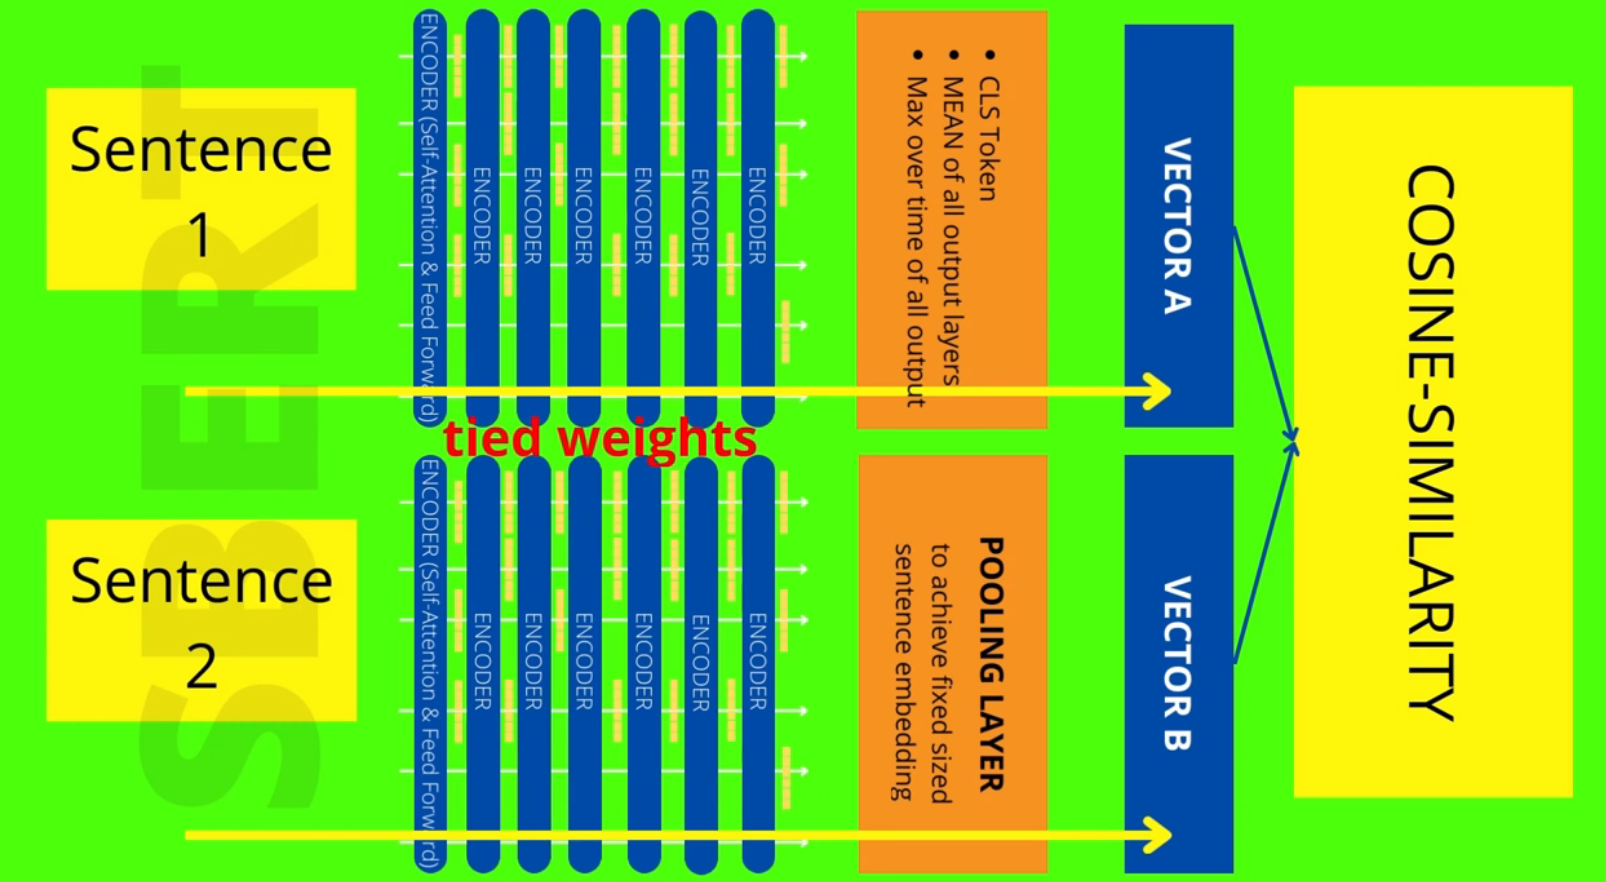